In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# A. 데이터 전처리 - 데이터 읽어오기

In [78]:
# ['Date', 'Open', 'High','Low','Close'] 컬럼만 불러오기
df =  pd.read_csv('./archive/NFLX.csv', usecols=['Date', 'Open', 'High','Low','Close'])

df

,Date,Open,High,Low,Close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
4,2018-02-09,253.850006,255.800003,236.110001,249.470001
...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006


# B. 데이터 전처리 - 2021년 이후의 종가 데이터 출력하기

In [71]:
# 일자 데이터를 datetime 형식을 변경
df['Date'] = pd.to_datetime(df['Date'])

# 2021년 이후의 데이터프레임 생성
df_2021 = df[df['Date'] >= '2021-01-01'].copy()
df_2021.head()

,Date,Open,High,Low,Close
733,2021-01-04,539.000000,540.799988,515.090027,522.859985
734,2021-01-05,521.549988,526.780029,515.890015,520.799988
735,2021-01-06,511.970001,513.099976,499.500000,500.489990
736,2021-01-07,508.279999,516.440002,506.420013,508.890015
737,2021-01-08,511.309998,513.239990,504.510010,510.399994


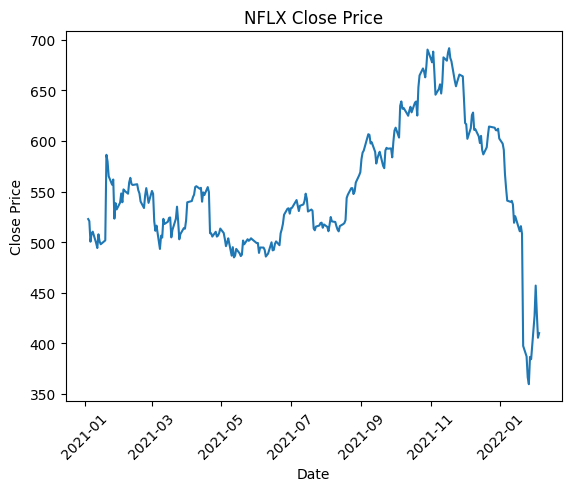

In [59]:
# 그래프 그리기
plt.plot(df_2021['Date'], df_2021['Close'])

# 그래프 제목 설정
plt.title('NFLX Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Close Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()


# C. 데이터 분석 - 2021년 이후 최고, 최저 종가 출력하기

In [61]:
# 2021이후 최고, 최저 종가 변수 생성
max_price = df_2021['Close'].max()
min_price = df_2021['Close'].min()

print('최고 종가:', max_price)
print('최저 종가:', min_price)

최고 종가: 691.690002
최저 종가: 359.700012


# D. 데이터 분석 - 2021년 이후 월별 평균 종가 출력하기

In [75]:
# month 변수를 생성하여 연도와 월을 식별할 수 있도록함
df_2021['month'] = df_2021['Date'].apply(lambda x: str(x)[:7])
df_2021.head()

,Date,Open,High,Low,Close,month
733,2021-01-04,539.000000,540.799988,515.090027,522.859985,2021-01
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,2021-01
735,2021-01-06,511.970001,513.099976,499.500000,500.489990,2021-01
736,2021-01-07,508.279999,516.440002,506.420013,508.890015,2021-01
737,2021-01-08,511.309998,513.239990,504.510010,510.399994,2021-01


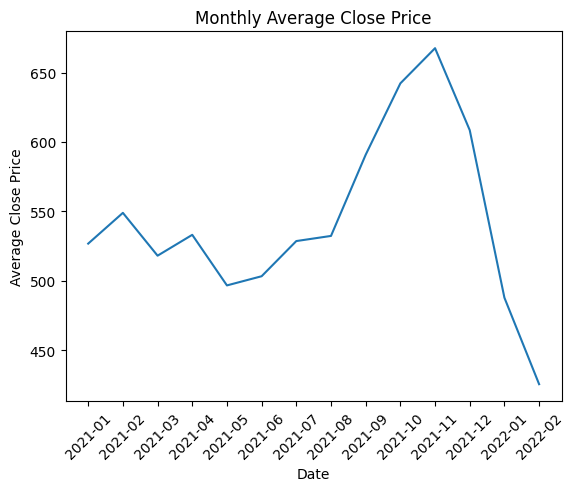

In [83]:
# groupby를 통해 월별 평균 종가 값을 구하여 그래프 그리기
plt.plot(df_2021.groupby('month')['Close'].mean())

# 그래프 제목 설정
plt.title('Monthly Average Close Price')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Average Close Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

# E. 데이터 시각화 - 2022년 이후 최고, 최저, 종가 시각화하기

In [73]:
# 2022년 이후의 데이터프레임 생성
df_2022 = df[df['Date'] >= '2022-01-01'].copy()
df_2022.head()

,Date,Open,High,Low,Close
985,2022-01-03,605.609985,609.989990,590.559998,597.369995
986,2022-01-04,599.909973,600.409973,581.599976,591.150024
987,2022-01-05,592.000000,592.840027,566.880005,567.520020
988,2022-01-06,554.340027,563.359985,542.010010,553.289978
989,2022-01-07,549.460022,553.429993,538.219971,541.059998


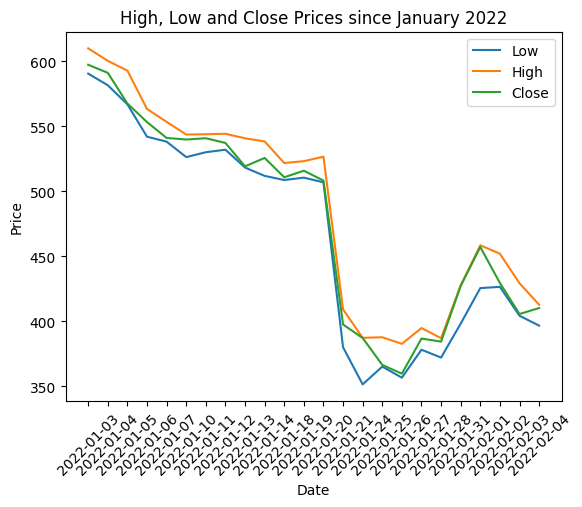

In [74]:
# 그래프 그리기
plt.plot(df_2022['Date'], df_2022['Low'], label='Low')
plt.plot(df_2022['Date'], df_2022['High'], label='High')
plt.plot(df_2022['Date'], df_2022['Close'], label='Close')

# 그래프 제목 설정
plt.title('High, Low and Close Prices since January 2022')

# x축 레이블 설정
plt.xlabel('Date')

# y축 레이블 설정
plt.ylabel('Price')

# x 축 설정(회전시키기)
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()